# Assignment Part-I

#### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

C:\Users\kwfg015\AppData\Roaming\Python\Python37\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# Reading data
data = pd.read_csv('train.csv')

#### Data Prechecks

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Shape of data
data.shape

(1460, 81)

In [5]:
#Count of data
data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [6]:
#Columns in data
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#Data Description
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# modifying display options
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

In [9]:
#checking null values
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

##### From the above result we can find that some of the columns in the data have null values so proceeding with data cleaning process

## Data Cleaning

In [10]:
# 1. Dropping duplicate values
# 2. Removing identifier field
# 3. Removing columns with unique values = 1 
data = data.drop_duplicates()
data.drop(['Id'], axis=1, inplace=True)
distinct = data.apply(lambda x:x.nunique())
data.drop(distinct[distinct < 2].index, axis = 1)
data.shape

(1460, 80)

In [11]:
# Nullvalues in the columns in percentage
((data.isnull().sum()/data.shape[0])*100).round(2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [12]:
# Dropping Columns with more than 15 % missing values
data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1, inplace=True)
print(((data.isnull().sum()/data.shape[0])*100).round(2))

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [13]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
data.dropna(axis='rows', inplace=True)
data.shape

(1338, 74)

In [14]:
# As we cleaned our data, Verifying the null values percentage for each column
((data.isnull().sum()/data.shape[0])*100).round(2)

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

In [15]:
# Creating derived features by converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
data['DiffYearBuilt'] = pd.datetime.now().year - data['YearBuilt']
data['DiffYearRemodAdd'] = pd.datetime.now().year - data['YearRemodAdd']
data['DiffGarageYrBlt'] = pd.datetime.now().year - data['GarageYrBlt']

In [16]:
# Prediction COLUMN:
pred_col = 'SalePrice'

In [17]:
# NUMERICAL COLUMNS: 
num_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
print(len(num_col))

30


In [18]:
# CATEGORICAL COLUMNS: 
cat_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(cat_col))

43


## Exploratory Data Analysis

In [19]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=data[[col_i,col_o]])

In [20]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = data[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = data[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=data[[col_i,col_o]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

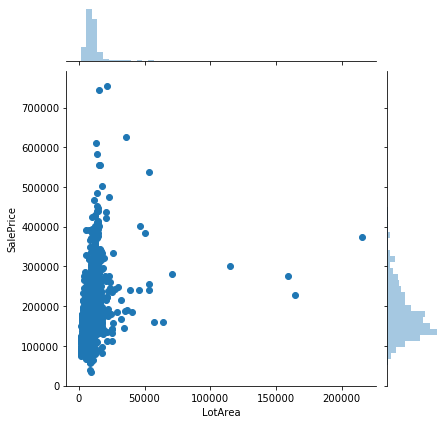

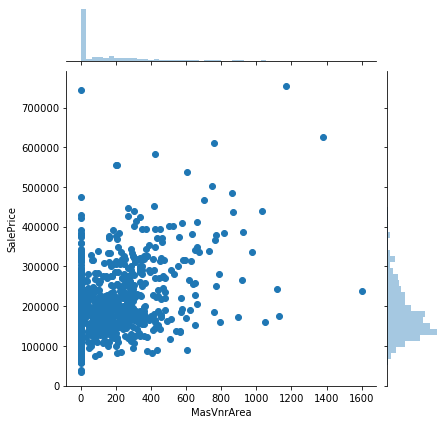

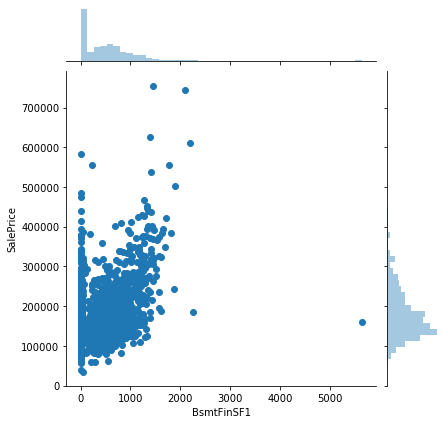

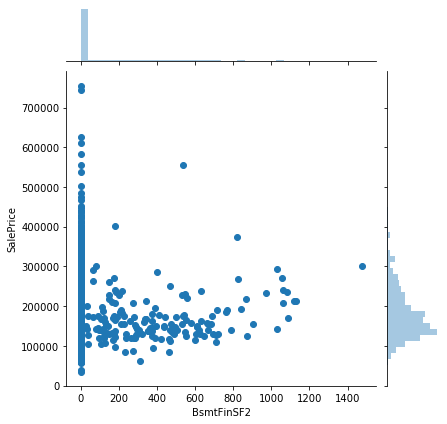

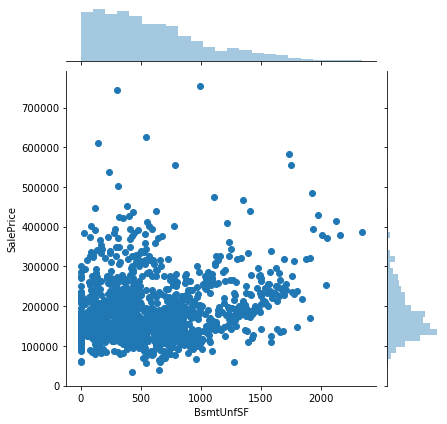

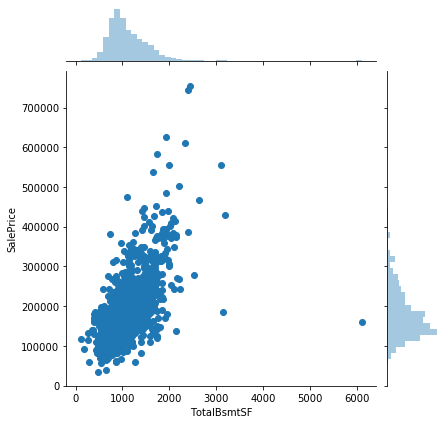

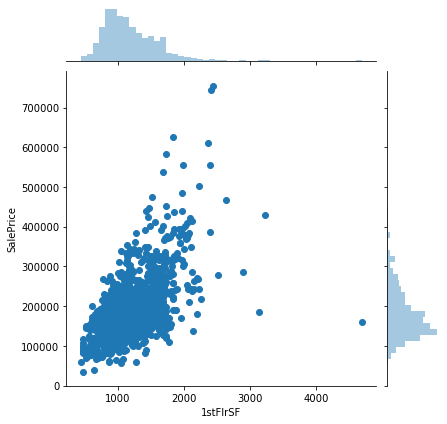

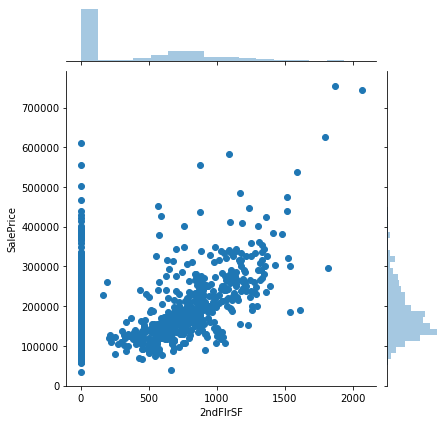

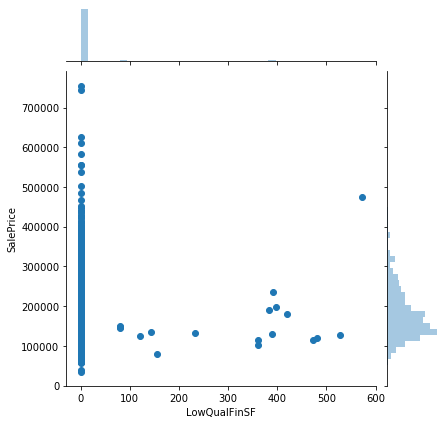

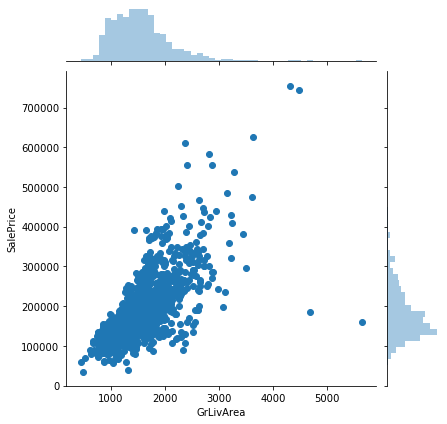

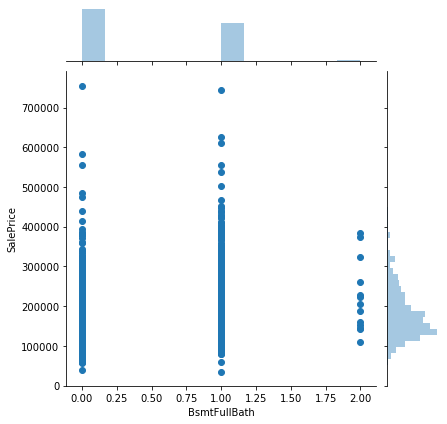

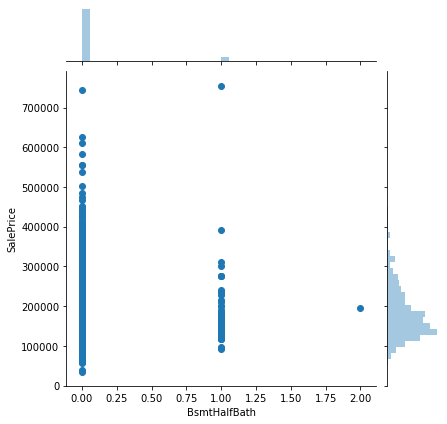

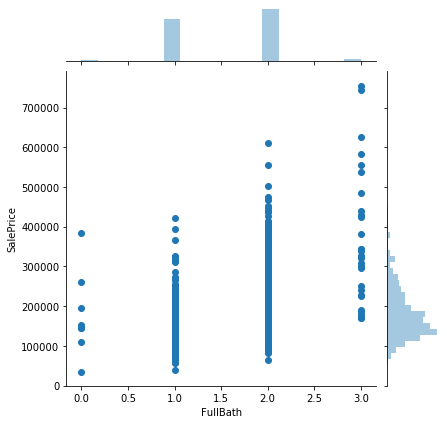

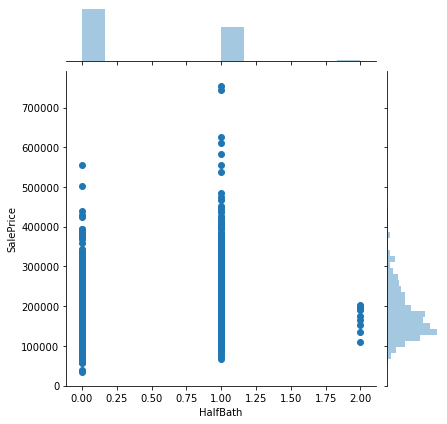

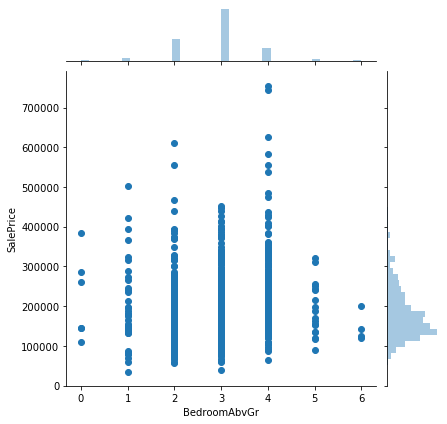

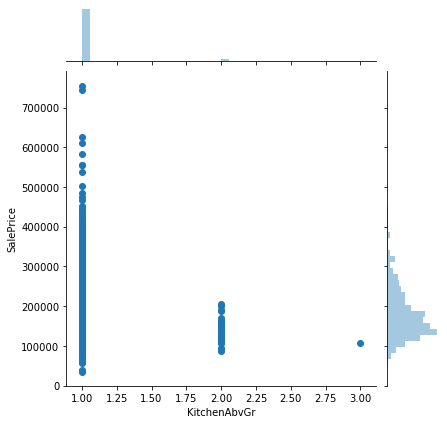

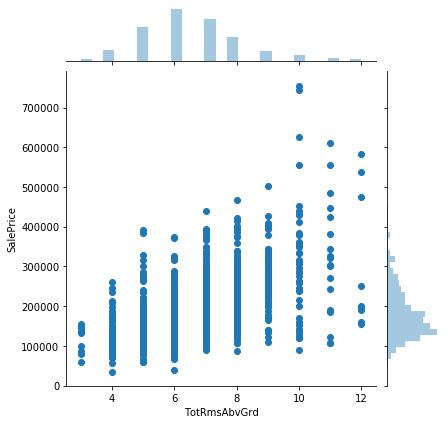

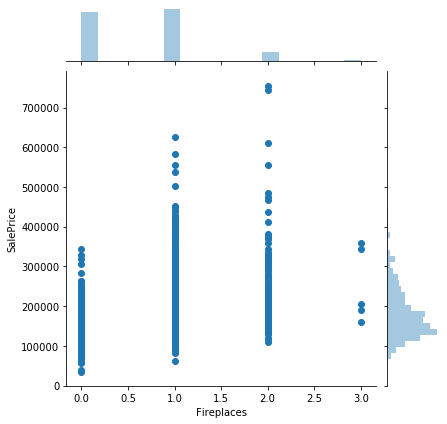

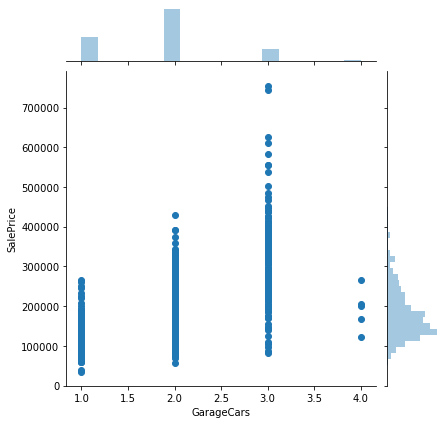

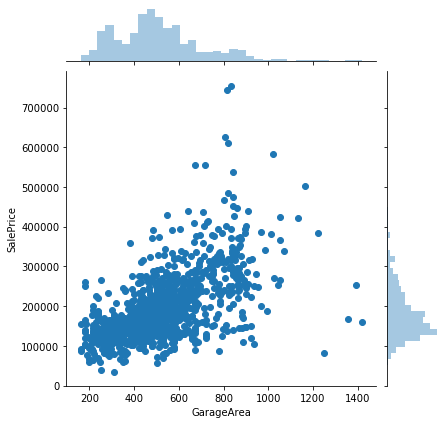

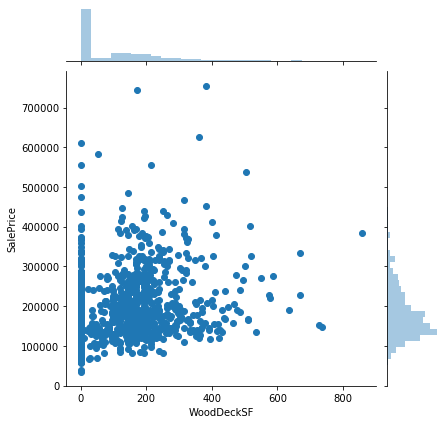

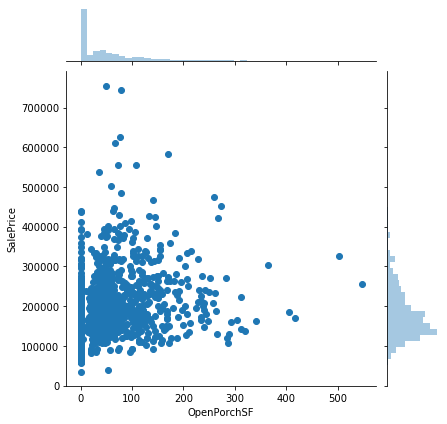

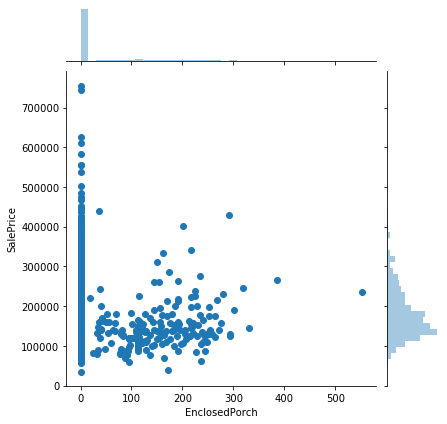

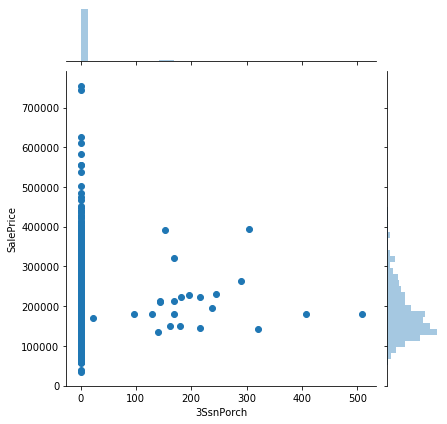

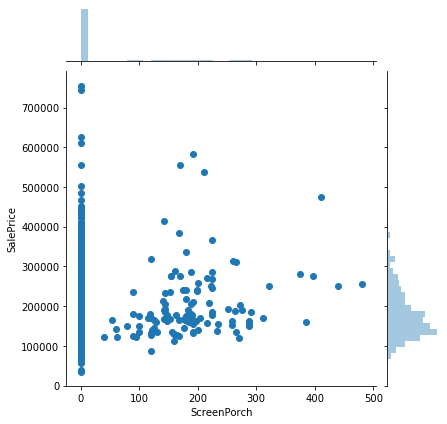

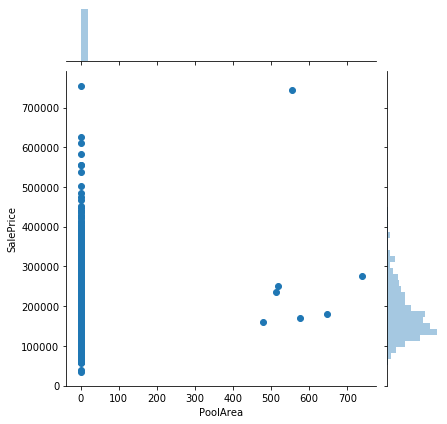

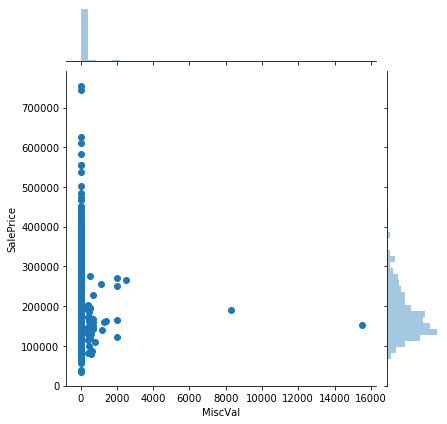

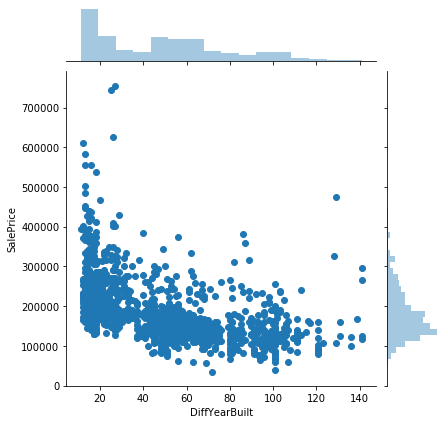

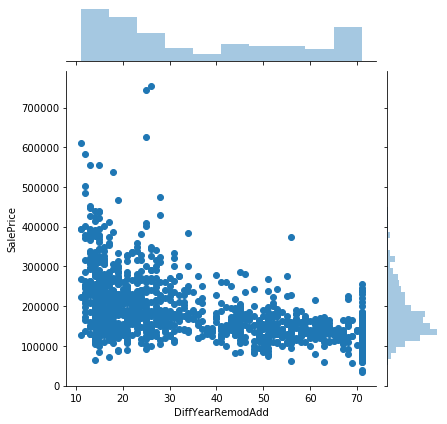

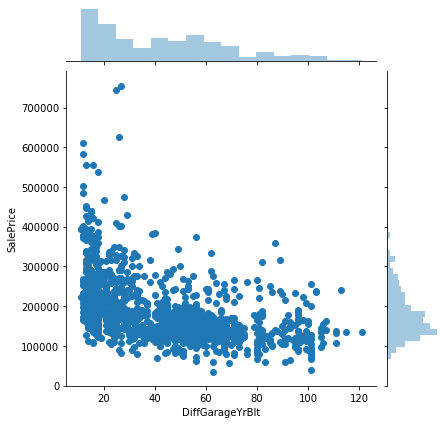

In [21]:
# NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(num_col):
    num_col_analysis(i, col, pred_col)

<Figure size 432x288 with 0 Axes>

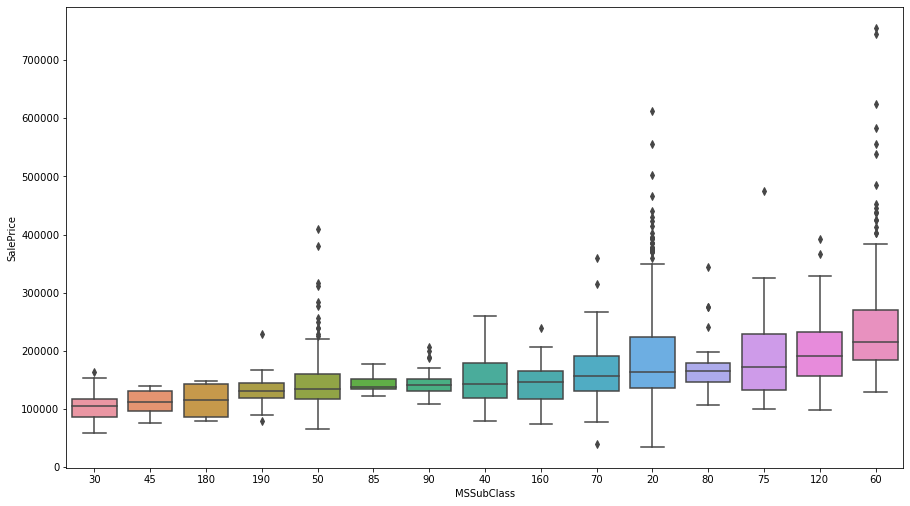

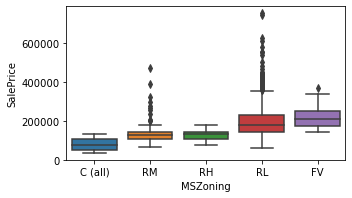

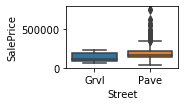

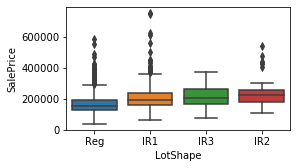

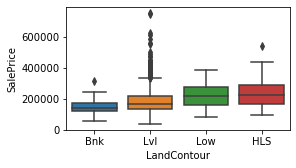

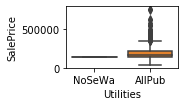

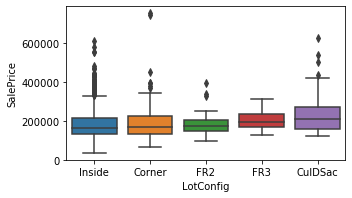

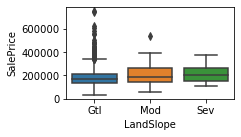

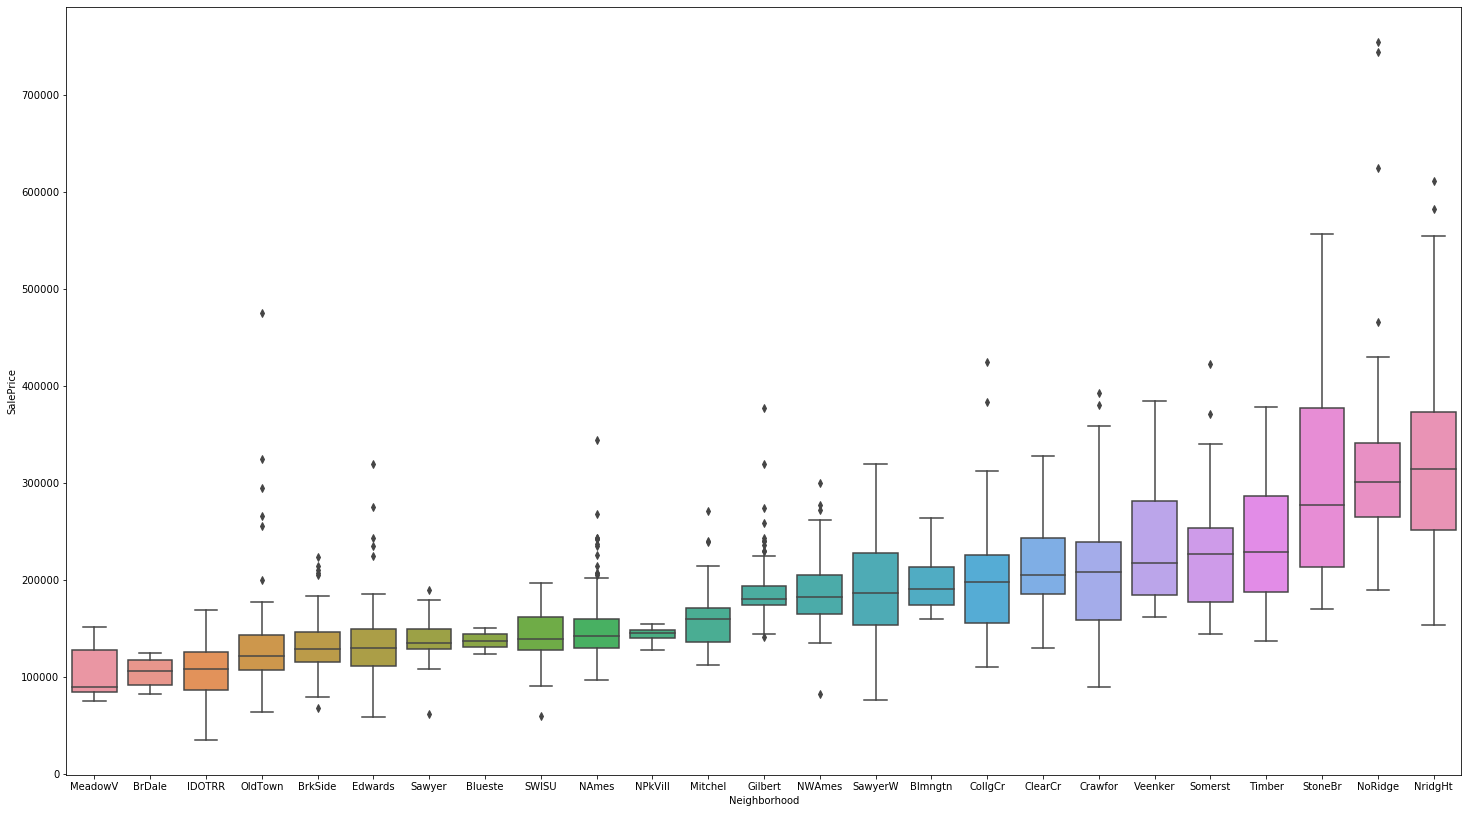

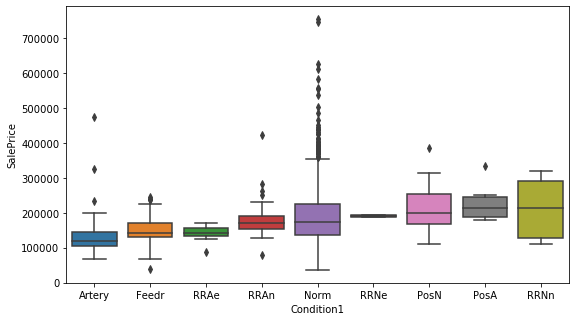

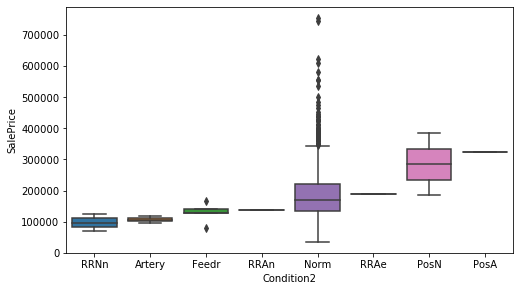

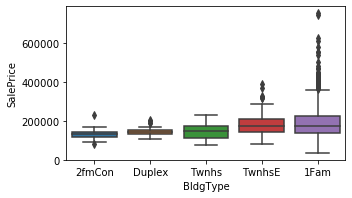

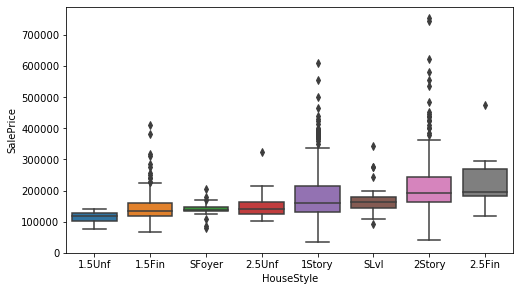

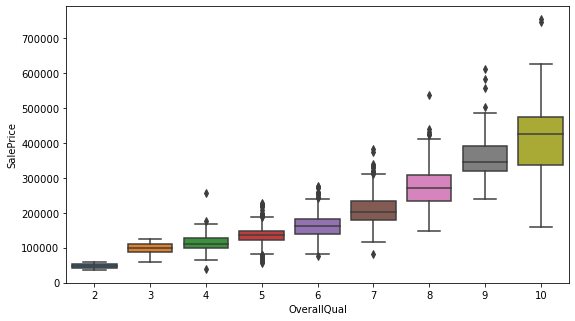

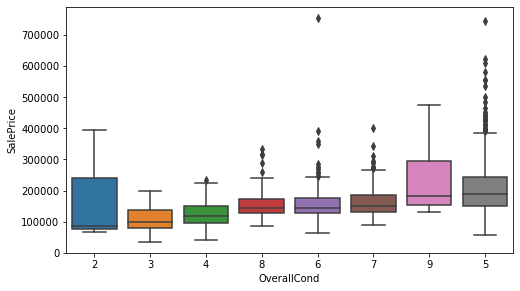

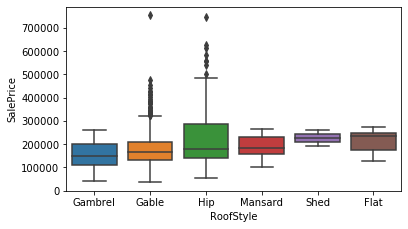

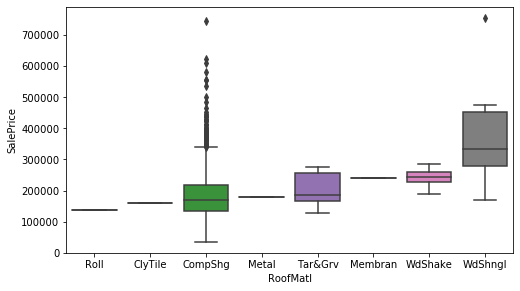

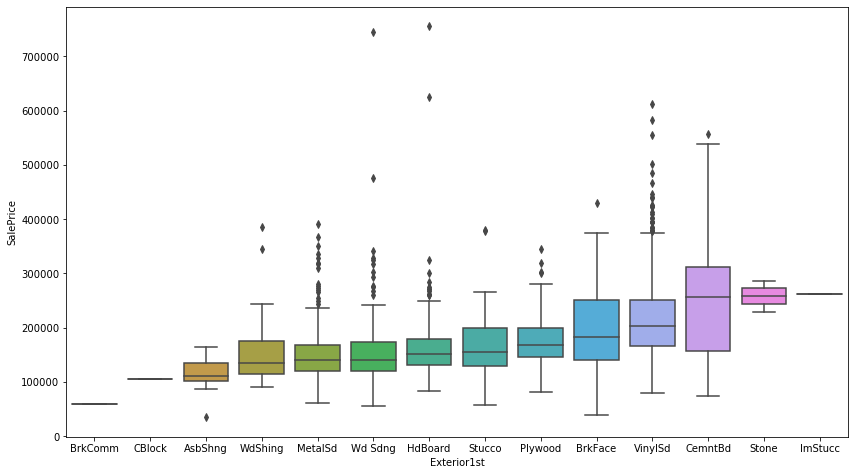

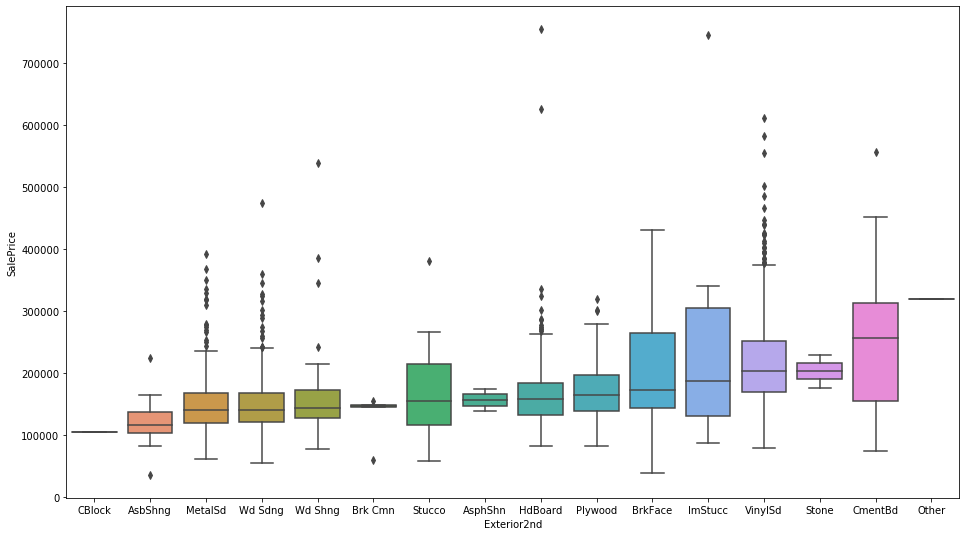

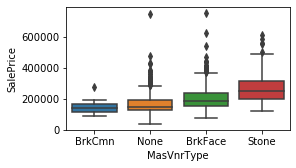

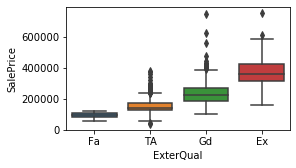

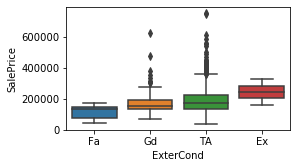

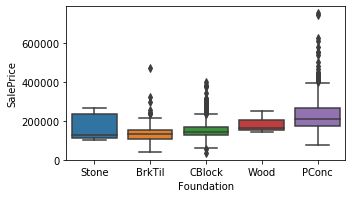

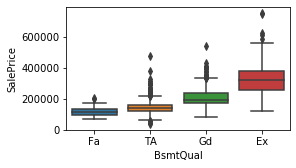

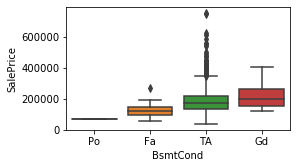

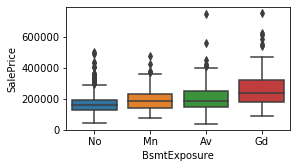

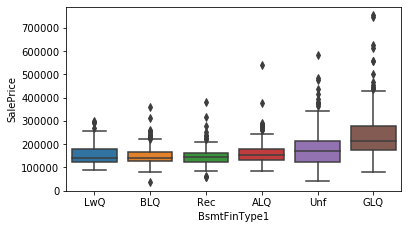

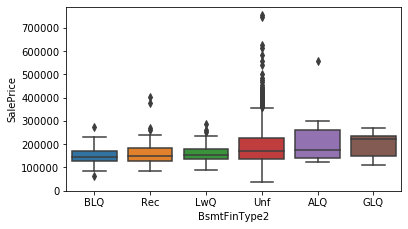

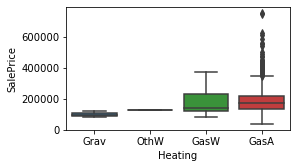

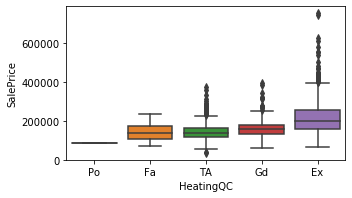

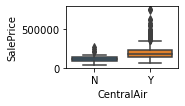

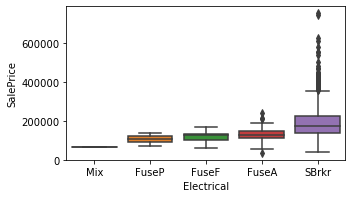

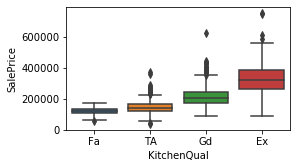

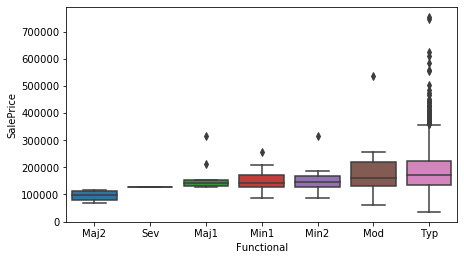

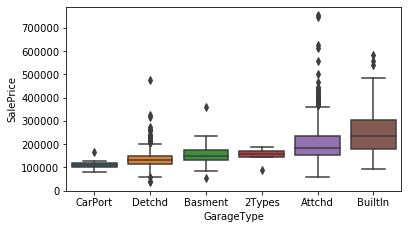

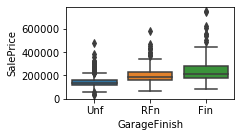

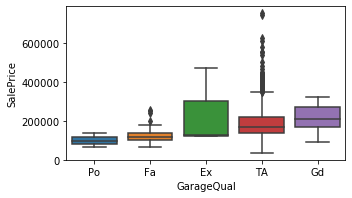

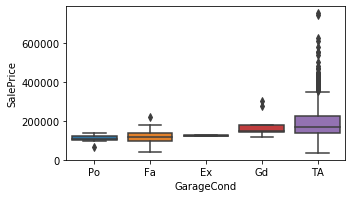

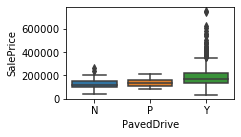

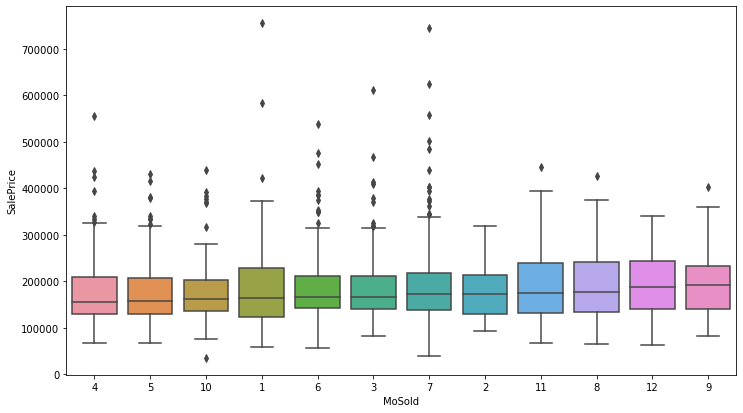

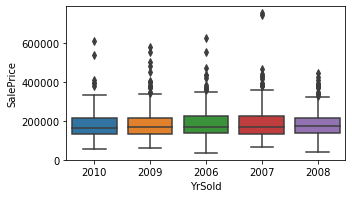

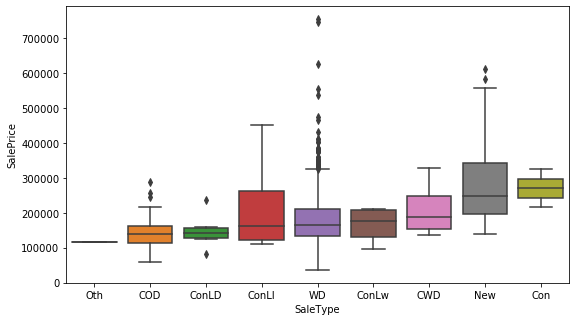

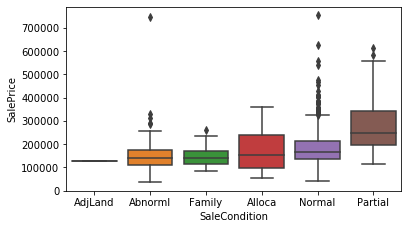

In [22]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, pred_col)

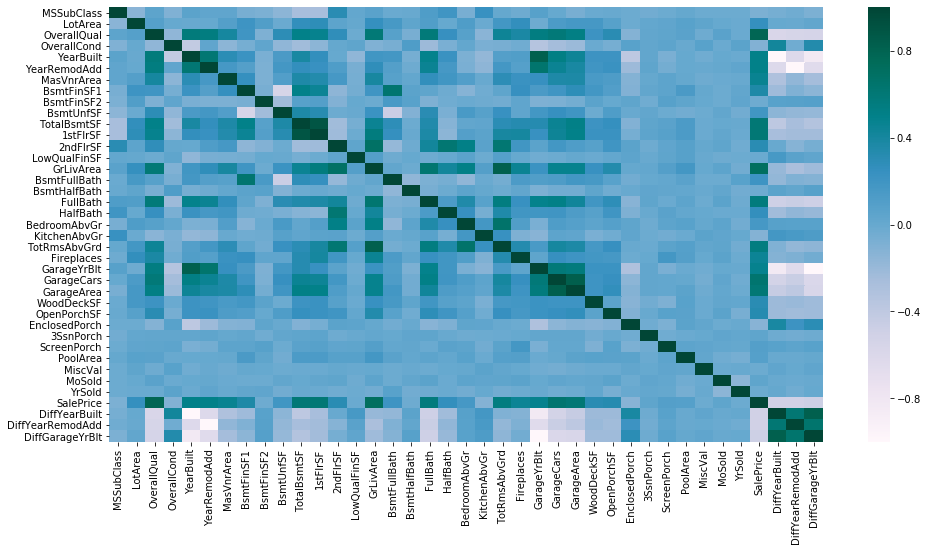

In [23]:
# correlations on a heatmap
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), cmap="PuBuGn", annot=False)
plt.show()

##### From the above plot we could see there exist some linear relationship between various columns and output column. 
##### we could also see there are some present collinearity in data

In [24]:
# Dumifying all columns using a loop
for col in cat_col:
    dummies = pd.get_dummies(data[col], drop_first = True)
    dummies = dummies.add_prefix(f'{col}_')
    data = pd.concat([data, dummies], axis = 1)
    data.drop([col], axis = 1, inplace = True)
data.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,9600,1976,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,9550,1915,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


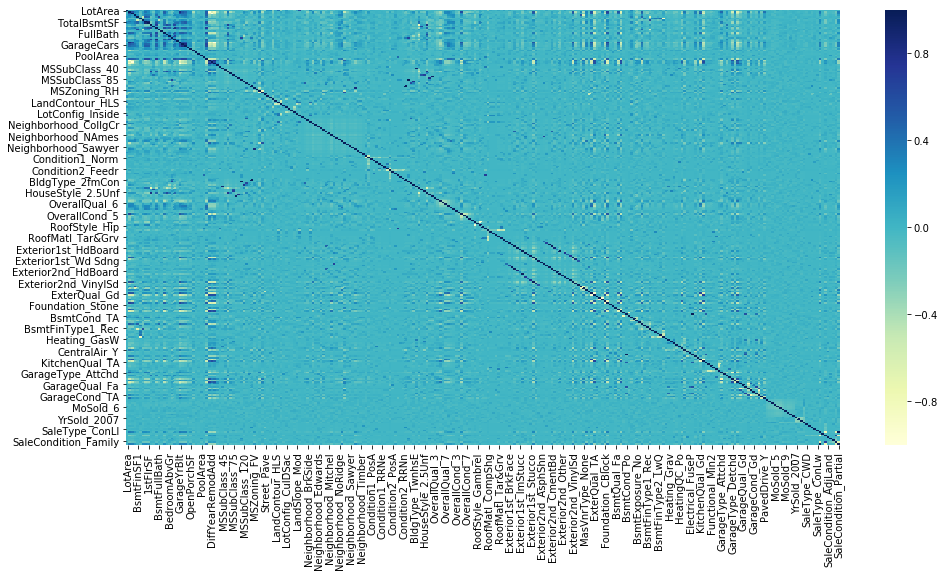

In [25]:
# heatmap
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=False)
plt.show()

#### As the heatmap is very condensed and we could see a lot of collinearity in data, hence proceed with feature selection process

## Data Preparation

In [26]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(data[num_col]))
# Outlier Removed Records
selected = data[num_col][(z < 3).all(axis=1)]
data = data.loc[selected.index]
data

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0
6,10084,2004,2005,186.0,1369,0,317,1686,1694,0,...,0,0,0,0,1,0,0,0,1,0
10,11200,1965,1965,0.0,906,0,134,1040,1040,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,9262,2008,2009,194.0,0,0,1573,1573,1578,0,...,0,0,1,0,0,0,0,0,0,1
1452,3675,2005,2005,80.0,547,0,0,547,1072,0,...,0,0,0,0,1,0,0,0,1,0
1454,7500,2004,2005,0.0,410,0,811,1221,1221,0,...,0,0,0,0,1,0,0,0,1,0
1455,7917,1999,2000,0.0,0,0,953,953,953,694,...,0,0,0,0,1,0,0,0,1,0


In [27]:
# Preparing Test and Train Set
y = data.loc[:, pred_col]
X = data.loc[:, data.columns != pred_col]
# scale
scaler = StandardScaler()
scaler.fit(X)
# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 1)

 -----

## Model Building

### Simple Linear Regression

In [28]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print("Train Score:",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print("Test Score:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Score: 0.9528333512101549
Test Score: 0.898482044440651


In [29]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-526400.193, 'constant'),
 (-63863.821, 'MSSubClass_180'),
 (62640.815, 'SaleCondition_AdjLand'),
 (-53248.349, 'MSSubClass_85'),
 (47012.779, 'HouseStyle_SFoyer'),
 (44092.321, 'OverallQual_9'),
 (-42957.4, 'SaleCondition_Alloca'),
 (42036.962, 'MSZoning_FV'),
 (39549.886, 'HouseStyle_1.5Unf'),
 (39209.612, 'OverallQual_10'),
 (-37944.635, 'MSSubClass_80'),
 (36826.987, 'Exterior2nd_CmentBd'),
 (-36522.122, 'Neighborhood_MeadowV'),
 (-35873.347, 'MSSubClass_160'),
 (-33144.306, 'Functional_Mod'),
 (30698.139, 'SaleCondition_Partial'),
 (-30551.207, 'MSSubClass_90'),
 (-30551.207, 'BldgType_Duplex'),
 (30452.485, 'HouseStyle_SLvl'),
 (30308.413, 'OverallCond_9'),
 (-29947.172, 'MSSubClass_45'),
 (-29489.098, 'RoofMatl_WdShake'),
 (29459.633, 'MSZoning_RH'),
 (27882.273, 'OverallCond_8'),
 (26553.494, 'MSZoning_RL'),
 (-26510.601, 'SaleType_ConLI'),
 (26438.286, 'Foundation_Stone'),
 (26359.862, 'Condition1_RRNn'),
 (25205.134, 'Functional_Typ'),
 (23830.594, 'Neighborhood_StoneBr'),


**Observation:**
#### From the above result we could see that most of the coefficients from the Linear Regression model are non-zero values hence this model doesn't help us with the feature selection.

-----

## Ridge Regression

In [30]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009402,0.001496,0.002000,6.321840e-04,0.0001,{'alpha': 0.0001},-20040.256818,-17967.075902,-15258.901538,-17502.421801,...,-17616.947206,1527.025613,26,-8737.003001,-8945.166118,-9844.210751,-9291.960715,-9425.734304,-9248.814978,385.178467
1,0.009001,0.000633,0.002201,7.488415e-04,0.001,{'alpha': 0.001},-20027.830659,-17759.392909,-15181.867438,-17467.724044,...,-17541.619125,1541.145330,25,-8739.359052,-8951.056300,-9847.929777,-9292.639738,-9427.303278,-9251.657629,384.936980
2,0.009599,0.001356,0.002000,1.488160e-06,0.01,{'alpha': 0.01},-19898.767497,-16814.836486,-14864.608162,-17201.725579,...,-17149.608520,1607.907571,24,-8758.827889,-8991.596631,-9875.386254,-9298.375155,-9438.644122,-9272.566010,383.278214
3,0.010199,0.001940,0.002001,7.893059e-07,0.05,{'alpha': 0.05},-19387.795251,-16084.056206,-14262.329824,-16586.477091,...,-16545.029498,1644.749270,23,-8817.485726,-9050.513803,-9951.254475,-9323.263753,-9467.278612,-9321.959274,386.084982
4,0.009802,0.000400,0.002000,1.000222e-06,0.1,{'alpha': 0.1},-18968.234339,-15768.549106,-13827.787686,-16208.502370,...,-16164.238943,1642.766428,21,-8871.944933,-9090.693200,-10013.223890,-9357.765057,-9492.690014,-9365.263419,388.561055


In [32]:
#printing the best hyperparameter alpha
model_cv.best_params_

{'alpha': 4.0}

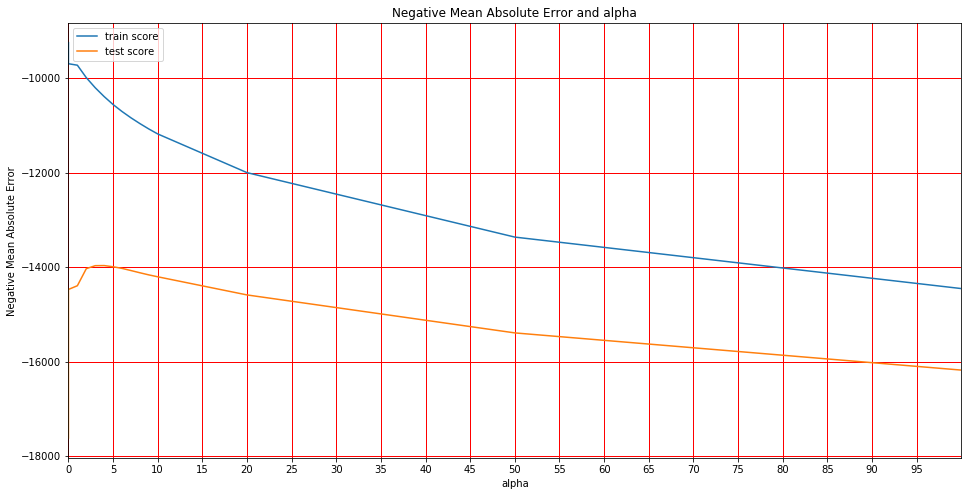

In [33]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [34]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print('Train score:',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print('Test score:',metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

Train score: 0.9460249894962849
Test score: 0.9152898297301234


In [35]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-484787.162, 'constant'),
 (26508.528, 'OverallQual_9'),
 (21072.822, 'Neighborhood_StoneBr'),
 (-17360.768, 'KitchenQual_Gd'),
 (17017.168, 'Functional_Typ'),
 (-16934.519, 'KitchenQual_TA'),
 (16306.799, 'Neighborhood_Crawfor'),
 (-15955.873, 'Functional_Mod'),
 (-15133.388, 'Neighborhood_MeadowV'),
 (-12748.031, 'SaleCondition_Alloca'),
 (12522.33, 'Exterior1st_BrkFace'),
 (11717.671, 'SaleCondition_Partial'),
 (-11558.389, 'OverallCond_3'),
 (-10949.877, 'Condition1_RRAe'),
 (-10826.345, 'MSSubClass_160'),
 (10825.35, 'BsmtExposure_Gd'),
 (-10550.902, 'Neighborhood_Edwards'),
 (-10502.732, 'KitchenQual_Fa'),
 (10327.416, 'MSZoning_FV'),
 (10207.03, 'OverallQual_10'),
 (-9935.215, 'OverallQual_4'),
 (9581.424, 'OverallCond_8'),
 (-9395.542, 'OverallQual_6'),
 (8705.198, 'BsmtFinType1_GLQ'),
 (8551.531, 'MasVnrType_Stone'),
 (-8479.422, 'BsmtQual_Gd'),
 (8322.03, 'Neighborhood_BrDale'),
 (8248.003, 'Condition1_Norm'),
 (-8213.917, 'BsmtQual_TA'),
 (-8094.663, 'Neighborhood_NWAmes')

**Observation:**
#### From the above result we could see that most of the coefficients from the Ridge regression model are non-zero values hence this model doesn't help us with the feature selection.

----

## Lasso Regression

In [36]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   18.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.132216,0.011198,0.001801,0.000400,0.0001,{'alpha': 0.0001},-20354.989290,-17139.509653,-15146.586233,-17522.701449,...,-17488.137806,1665.476378,27,-8739.546114,-8997.068544,-9855.239799,-9294.859731,-9430.943130,-9263.531464,380.707240
1,0.129268,0.011724,0.002402,0.000489,0.001,{'alpha': 0.001},-20351.941084,-17131.209484,-15144.100412,-17519.524150,...,-17483.646574,1665.599763,26,-8739.570861,-8997.070072,-9855.245437,-9294.846648,-9430.947550,-9263.536114,380.702141
2,0.115415,0.006152,0.002601,0.000490,0.01,{'alpha': 0.01},-20322.990556,-17056.620745,-15118.840954,-17486.896703,...,-17440.481851,1667.230864,25,-8739.937154,-8997.225114,-9855.416348,-9294.854997,-9431.030123,-9263.692747,380.640152
3,0.118524,0.015713,0.001800,0.000400,0.05,{'alpha': 0.05},-20303.619698,-16981.060842,-15078.585628,-17415.147825,...,-17356.992132,1681.741279,24,-8741.822025,-8998.252448,-9857.015693,-9295.137387,-9431.705720,-9264.786655,380.539318
4,0.113712,0.014706,0.002001,0.000633,0.1,{'alpha': 0.1},-20264.859289,-16955.900975,-15028.055928,-17393.540778,...,-17310.196283,1687.123558,23,-8744.295160,-8999.585884,-9859.435085,-9295.617117,-9432.800541,-9266.346758,380.530318


In [38]:
#printing the best hyperparameter alpha
model_cv.best_params_

{'alpha': 50}

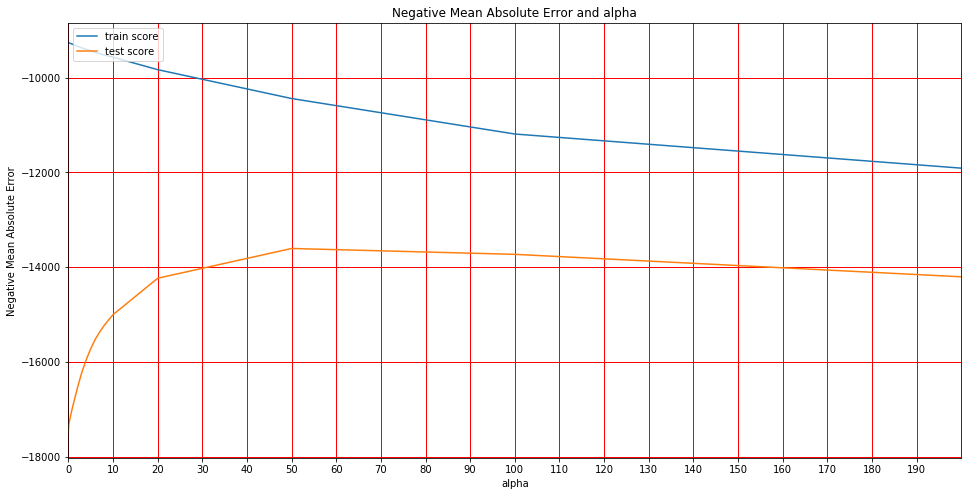

In [39]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [40]:
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print('Train Score:',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print('Test Score:',metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

Train Score: 0.9451804944627855
Test Score: 0.9145348792017323


In [41]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1749883.891, 'constant'),
 (44090.81, 'OverallQual_9'),
 (28811.319, 'OverallQual_10'),
 (-28616.24, 'SaleCondition_Alloca'),
 (27458.272, 'Neighborhood_StoneBr'),
 (-27408.595, 'Functional_Mod'),
 (23028.136, 'Neighborhood_Crawfor'),
 (-22777.991, 'Neighborhood_MeadowV'),
 (-19807.934, 'KitchenQual_TA'),
 (-19293.312, 'KitchenQual_Gd'),
 (18086.014, 'SaleCondition_Partial'),
 (17443.443, 'Exterior1st_BrkFace'),
 (15927.706, 'Functional_Typ'),
 (15336.547, 'OverallQual_8'),
 (-14376.206, 'Condition1_RRAe'),
 (-13807.831, 'KitchenQual_Fa'),
 (-13204.071, 'MSSubClass_160'),
 (12439.447, 'BsmtExposure_Gd'),
 (10677.755, 'MSZoning_FV'),
 (10541.689, 'Neighborhood_NoRidge'),
 (10172.209, 'Neighborhood_BrkSide'),
 (9456.502, 'OverallCond_8'),
 (8633.016, 'MasVnrType_Stone'),
 (8270.356, 'Exterior1st_CemntBd'),
 (-8254.628, 'OverallCond_3'),
 (8002.555, 'BsmtFinType1_GLQ'),
 (-7815.645, 'Neighborhood_Edwards'),
 (-7740.807, 'OverallCond_5'),
 (6881.349, 'Condition1_Norm'),
 (-6532.466, 'Bs

**Observation:**
#### From the above result we could see that most of the coefficients from the Lasso regression model are zero values hence this model help us with the feature selection.
#### Proceeding with  Lasso regression model for further analysis

-----

## Automated selection of Predictors (RFE)

In [42]:
# Running RFE with the output number of the variable equal to 30
rfe = RFE(lm, 30)            
rfe = rfe.fit(X_train, y_train)

In [43]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [44]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

#### Model 1

In [45]:
# Let's consider all the columns selected by RFE for our first model
make_lr_model_mp(list(data[auto_selected_predictors]))

Parameters obtained for ['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA']
const                    -0.152987
YearBuilt                -0.760824
YearRemodAdd             85.925984
BsmtFinSF1               24.983073
BsmtFinSF2                8.571376
TotalBsmtSF              65.031127
1stFlrSF                 23.909019
2ndFlrSF                 48.135927
LowQualFinSF            -33.370026
GrLivArea                38.674920
GarageYrBlt             -57.913732
DiffYearBuilt          -308.425266
DiffYearRemodAdd       -395.112073

#### Model 2

In [46]:
# Let's consider all the columns selected by Lasso for our second model
make_lr_model_mp(list(data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'Functional_Typ', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211555.786196
OverallQual_9             91607.338623
OverallQual_10            72474.274804
SaleCondition_Alloca     -64806.887443
Neighborhood_StoneBr      32001.856483
Functional_Mod            -6000.629520
Neighborhood_Crawfor      40134.212919
Neighborhood_MeadowV     -76764.002034
KitchenQual_TA           -64442.203727
KitchenQual_Gd           -4029

#### Model 3

In [47]:
# We got better VIF values with the features selected by Lasso, hence refining the model based on KPIs.
lasso_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211932.673435
OverallQual_9             91627.401478
OverallQual_10            72494.448562
SaleCondition_Alloca     -64793.601281
Neighborhood_StoneBr      31976.977889
Functional_Mod            -6356.819275
Neighborhood_Crawfor      40138.519223
Neighborhood_MeadowV     -76703.816419
KitchenQual_TA           -64446.979291
KitchenQual_Gd           -40287.996529
SaleCondi

#### Model 4

In [48]:
lasso_selected_features.remove('Functional_Mod')
make_lr_model_mp(list(data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211854.098572
OverallQual_9             91646.311525
OverallQual_10            72507.796095
SaleCondition_Alloca     -64714.770585
Neighborhood_StoneBr      31955.375853
Neighborhood_Crawfor      40179.705046
Neighborhood_MeadowV     -76466.582073
KitchenQual_TA           -64509.499322
KitchenQual_Gd           -40265.705617
SaleCondition_Partial     23492.508700
Exterior1st_BrkFace       3

#### Model 5

In [49]:
lasso_selected_features.remove('OverallCond_8')
make_lr_model_mp(list(data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212926.722456
OverallQual_9             91357.734121
OverallQual_10            72242.997361
SaleCondition_Alloca     -64645.189868
Neighborhood_StoneBr      31791.000668
Neighborhood_Crawfor      40575.190078
Neighborhood_MeadowV     -75862.432497
KitchenQual_TA           -65002.186502
KitchenQual_Gd           -40595.949699
SaleCondition_Partial     23433.923444
Exterior1st_BrkFace       33688.408672
Overa

#### Model 6

In [50]:
lasso_selected_features.remove('Neighborhood_BrkSide')
make_lr_model_mp(list(data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212474.326162
OverallQual_9             91460.977335
OverallQual_10            72472.257771
SaleCondition_Alloca     -63815.691357
Neighborhood_StoneBr      31863.853414
Neighborhood_Crawfor      40948.066014
Neighborhood_MeadowV     -75456.612663
KitchenQual_TA           -65061.358070
KitchenQual_Gd           -40405.521254
SaleCondition_Partial     23446.854316
Exterior1st_BrkFace       34014.610266
OverallQual_8             399

#### Model 7

In [51]:
lasso_selected_features.remove('MSZoning_FV')
make_lr_model_mp(list(data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212090.098373
OverallQual_9             91693.159249
OverallQual_10            73443.100653
SaleCondition_Alloca     -63875.269308
Neighborhood_StoneBr      30357.730124
Neighborhood_Crawfor      40847.901932
Neighborhood_MeadowV     -77755.465273
KitchenQual_TA           -64873.284473
KitchenQual_Gd           -39842.292811
SaleCondition_Partial     24010.594905
Exterior1st_BrkFace       34120.910180
OverallQual_8             40185.141358
Condi

#### Model 8

In [52]:
lasso_selected_features.remove('Condition1_Norm')
make_lr_model_mp(list(data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'BsmtQual_TA', 'GarageCond_Fa']
const                    216603.780767
OverallQual_9             91646.914523
OverallQual_10            73667.690253
SaleCondition_Alloca     -62617.702106
Neighborhood_StoneBr      30649.441876
Neighborhood_Crawfor      41139.872407
Neighborhood_MeadowV     -77277.730201
KitchenQual_TA           -65116.568862
KitchenQual_Gd           -39921.589684
SaleCondition_Partial     23921.682325
Exterior1st_BrkFace       33763.124187
OverallQual_8             40214.451337
Condition1_RRAe         

#### Model 9

In [53]:
lasso_selected_features.remove('OverallCond_5')
make_lr_model_mp(list(data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'BsmtQual_TA', 'GarageCond_Fa']
const                    220273.194346
OverallQual_9             92312.525236
OverallQual_10            74317.288936
SaleCondition_Alloca     -62669.002130
Neighborhood_StoneBr      29610.248933
Neighborhood_Crawfor      39487.910338
Neighborhood_MeadowV     -78764.789055
KitchenQual_TA           -64974.260017
KitchenQual_Gd           -39760.651420
SaleCondition_Partial     24752.541616
Exterior1st_BrkFace       32933.835323
OverallQual_8             40985.372071
Condition1_RRAe          -24666.780718
Ki

#### The above model represent good in terms of p-value and VIF with the Adjusted R-square of 0.775 score

#### Final Model Paramaters

In [54]:
lasso_selected_features

['OverallQual_9',
 'OverallQual_10',
 'SaleCondition_Alloca',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'KitchenQual_TA',
 'KitchenQual_Gd',
 'SaleCondition_Partial',
 'Exterior1st_BrkFace',
 'OverallQual_8',
 'Condition1_RRAe',
 'KitchenQual_Fa',
 'MSSubClass_160',
 'BsmtExposure_Gd',
 'Neighborhood_NoRidge',
 'MasVnrType_Stone',
 'Exterior1st_CemntBd',
 'OverallCond_3',
 'BsmtFinType1_GLQ',
 'Neighborhood_Edwards',
 'BsmtQual_TA',
 'GarageCond_Fa']

----

## Data Visualization of final model

Text(0, 0.5, 'Sales Price')

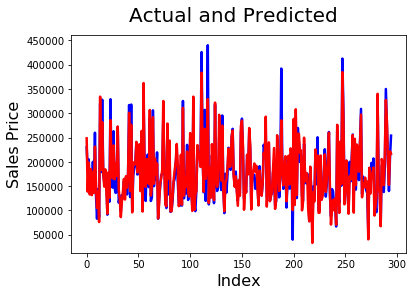

In [55]:
# Simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

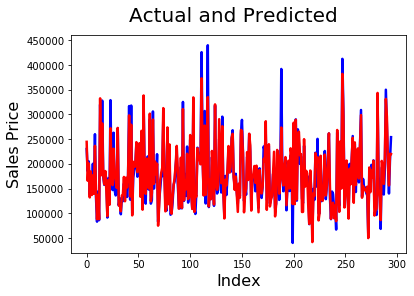

In [56]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

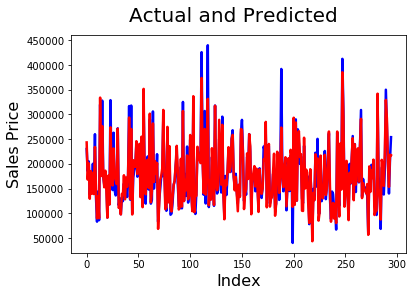

In [57]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

----

## Conclusion

- Based on the model accuracy on train and test set, we could see that the Linear Regression, Ridge Regression and Lasso Regression models have similar score
- As Linear Regression model had most of the coefficients values as non-zero and model was fairly complex, hence we would not consider that model.
- As Ridge Regression model had most of the coefficients values as non-zero and model was fairly complex, hence we would not consider that model.
- Optimum value of lambda for Ridge Regression is "4"
- As Lasso Regression model had most of the coefficients values as zero and model was simple, hence we considered that model.
- Optimum value of lambda for Lasso Regression is "50"

##### Most important 30 features that are affecting Sales pricing are:

In [58]:
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')

OverallQual_9                           Score: 44090.81
OverallQual_10                          Score: 28811.319
SaleCondition_Alloca                    Score: -28616.24
Neighborhood_StoneBr                    Score: 27458.272
Functional_Mod                          Score: -27408.595
Neighborhood_Crawfor                    Score: 23028.136
Neighborhood_MeadowV                    Score: -22777.991
KitchenQual_TA                          Score: -19807.934
KitchenQual_Gd                          Score: -19293.312
SaleCondition_Partial                   Score: 18086.014
Exterior1st_BrkFace                     Score: 17443.443
Functional_Typ                          Score: 15927.706
OverallQual_8                           Score: 15336.547
Condition1_RRAe                         Score: -14376.206
KitchenQual_Fa                          Score: -13807.831
MSSubClass_160                          Score: -13204.071
BsmtExposure_Gd                         Score: 12439.447
MSZoning_FV              

#### Some of the major influencer columns for Sales Pricing are: 
1. OverallCond
2. SaleCondition
3. Neighborhood
4. Functional
5. KitchenQual
6. Exterior1st
7. Condition1
8. MSSubClass
9. BsmtExposure
10. MSZoning